In [31]:
import  plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [50]:
exp_name = 'trajectories_test/pom_100000'
exp_name = 'trajectories_test/pom_10000'
outdir = '../../outputs/{}'.format(exp_name)

In [33]:
fits_all = np.load('../../outputs/{}/fits_raw.npz'.format(exp_name), allow_pickle=True)['data']
fits = fits_all[:,:,0:2]
vals = fits_all[:,:,2:]

## create sankey

In [34]:
## create sankey diagram
fit_flat = fits.reshape((fits.shape[0]*fits.shape[1], fits.shape[2]))
# fit_flat[:,0] = 1
n_orig = fit_flat.shape[0]
n_feas = np.sum(fit_flat[:,0])
n0 = np.sum(fit_flat[:,0] * (fit_flat[:,1]==0))
n1 = np.sum(fit_flat[:,0] * (fit_flat[:,1]==1))
n2 = np.sum(fit_flat[:,0] * (fit_flat[:,1]==2))
n3 = np.sum(fit_flat[:,0] * (fit_flat[:,1]==3))
nneg = np.sum(fit_flat[:,0] * (fit_flat[:,1]==-1))


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["all", "feasible", "infeasible", "s+e+", "s+e-", "s-e+", "s-e-","none"],
      color = ['green','green','black','blue','blue','blue','blue','black']
    ),
    link = dict(
      source = [0, 0, 1, 1, 1, 1, 1], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [1, 2, 3, 4, 5, 6, 7],
      value = [n_feas, n_orig-n_feas, n0, n1, n2, n3, nneg]
  ))])

fig.update_layout(title_text='Efficiency of trajectory classification', font_size=10, width=500, height=500)

## plots of the fitting vals

In [35]:
v = vals.reshape((vals.shape[0]*vals.shape[1], vals.shape[2]))
print('feas_a')
print(np.sum(v[:,0]))
print('feas_b')
print(np.sum(v[:,1]))
# print('stable_som')
# print(np.sum(v[:,4]))
# print('stable_R')
# print(np.sum(v[:,5]))

feas_a
3551
feas_b
9830


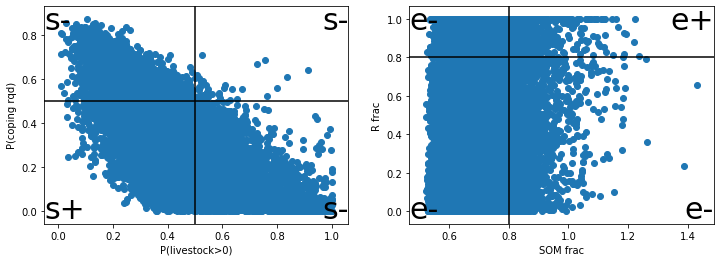

In [51]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
## social
ax = axs[0]
ax.scatter(v[:,2], v[:,3])
ax.set_xlabel('P(livestock>0)')
ax.set_ylabel('P(coping rqd)')
ax.axhline(0.5, color='k')
ax.axvline(0.5, color='k')
ax.text(0,0,'s+',transform=ax.transAxes, ha='left',va='bottom', fontsize=30)
ax.text(1,0,'s-',transform=ax.transAxes, ha='right',va='bottom', fontsize=30)
ax.text(0,1,'s-',transform=ax.transAxes, ha='left',va='top', fontsize=30)
ax.text(1,1,'s-',transform=ax.transAxes, ha='right',va='top', fontsize=30)

## enviro
ax = axs[1]
ax.scatter(v[:,4], v[:,5])
ax.set_xlabel('SOM frac')
ax.set_ylabel('R frac')
ax.axhline(0.8, color='k')
ax.axvline(0.8, color='k')
ax.text(0,0,'e-',transform=ax.transAxes, ha='left',va='bottom', fontsize=30)
ax.text(1,0,'e-',transform=ax.transAxes, ha='right',va='bottom', fontsize=30)
ax.text(0,1,'e-',transform=ax.transAxes, ha='left',va='top', fontsize=30)
ax.text(1,1,'e+',transform=ax.transAxes, ha='right',va='top', fontsize=30)
fig.savefig('{}/s_e_scatters.png'.format(outdir), dpi=200)